In [1]:
#Winsconsin database

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.preprocessing import scale

/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Best result obtained using Random Forest Classifier 0.965034965035

class CancerAnalysis:
    def __init__(self,path,index=469):
        data = np.genfromtxt(path,delimiter=',')
        # Remove nans
        data = data[~np.isnan(data).any(axis=1)]
        self.X_train= data[1:index,2:]
        self.Y_train = data[1:index,1]
        self.X_test = data[index+1:,2:]
        self.Y_test = data[index+1:,1]
        '''
        print self.X_train
        print self.Y_train
        print self.X_test
        print self.Y_test
        '''
        
    def byknn(self):
        print ("Result By KNN")
        training_accuracy = []
        test_accuracy = []
        for n_neighbors in range(1,100):
            clf = KNeighborsClassifier(n_neighbors= n_neighbors)
            clf.fit(self.X_train,self.Y_train)
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
            print ("Training at neighbors = "+str(n_neighbors),clf.score(self.X_test,self.Y_test))
        plt.plot(range(1,100),training_accuracy,label="Training")
        plt.plot(range(1,100),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Neighbors = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Neighbors')
        plt.legend()
        plt.show()
        return max(test_accuracy)
             
    def bylogistic(self):
        print ("Result By Logistic Regression")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,30):
            clf = LogisticRegression(C=i,solver='liblinear').fit(self.X_train,self.Y_train)
            print (clf.score(self.X_test,self.Y_test))
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
        plt.plot(range(1,30),training_accuracy,label="Training")
        plt.plot(range(1,30),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Inverse Regularization = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Inverse Regularization')
        plt.legend()
        plt.show()

        return max(test_accuracy)
    def bysvm(self):
        print ("Result By SVM")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,30):
            clf = LinearSVC(C=i,dual=True).fit(self.X_train,self.Y_train)
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
            print (clf.score(self.X_test,self.Y_test))
        
        plt.plot(range(1,30),training_accuracy,label="Training")
        plt.plot(range(1,30),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Inverse Regularization = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Inverse Regularization')
        plt.legend()
        plt.show()
        
        return max(test_accuracy)        
    def bydtree(self):
        print ("Result By Decision Tree Classifier")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,10):
            clf = DecisionTreeClassifier(random_state = 0,max_depth=i )
            clf.fit(self.X_train,self.Y_train)
         
            print (clf.score(self.X_test,self.Y_test))
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
        
        plt.plot(range(1,10),training_accuracy,label="Training")
        plt.plot(range(1,10),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Prepruining = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Prepruining')
        plt.legend()
        plt.show()
        
        return max(test_accuracy)
    def byrandom(self):
        print ("Result By Random Forest Classifier")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,20):
            clf = RandomForestClassifier(n_estimators = i,random_state = 2,max_features='auto',min_samples_split=2)
            clf.fit(self.X_train,self.Y_train)
            print (i,clf.score(self.X_test,self.Y_test),clf.score(self.X_train,self.Y_train))
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))     
        
        plt.plot(range(1,20),training_accuracy,label="Training")
        plt.plot(range(1,20),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Estimators = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Estimators')
        plt.legend()
        plt.show()
        return max(test_accuracy)

    def byNB(self):
        print ("Result By Naive Bayes Classifier")
        clf = GaussianNB()
        clf.fit(self.X_train,self.Y_train)
        return clf.score(self.X_test,self.Y_test)


    def bygradientboost(self):
        print ("Result By Gradient Boost")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,10):
            clf = GradientBoostingClassifier(random_state = 0,max_depth=i,learning_rate = 0.01)
            clf.fit(self.X_train,self.Y_train)
            print (clf.score(self.X_test,self.Y_test))
            training_accuracy.append(clf.score(self.X_train,self.Y_train))
            test_accuracy.append(clf.score(self.X_test,self.Y_test))
        plt.plot(range(1,10),training_accuracy,label="Training")
        plt.plot(range(1,10),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Estimators = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Prepruining')
        plt.legend()
        plt.show()
       
        return max(test_accuracy)

    def bypolysvm(self):
        print ("Result using Polynomial Kernel")
        training_accuracy = []
        test_accuracy = []
        for i in range(1,10):
            poly_svc = svm.SVC(kernel = 'poly',degree=i)
            poly_svc.fit(scale(self.X_train),self.Y_train)
            test_accuracy.append(poly_svc.score(scale(self.X_test),self.Y_test))
            training_accuracy.append(poly_svc.score(scale(self.X_train),self.Y_train))
        
        plt.plot(range(1,10),training_accuracy,label="Training")
        plt.plot(range(1,10),test_accuracy, label = "Test")
        print ("Max Accuracy "+str(max(test_accuracy))+"At Degree = "+str(test_accuracy.index(max(test_accuracy))+1))
        max_index = test_accuracy.index(max(test_accuracy))+1
        
        plt.plot(max_index,max(test_accuracy), 'ro',label="MAX")
        plt.ylabel('% accuracy')
        plt.xlabel('Degree')
        plt.legend()
        plt.show()
        return max(test_accuracy)

Result By KNN
Training at neighbors = 1 0.9230769230769231
Training at neighbors = 2 0.9090909090909091
Training at neighbors = 3 0.9300699300699301
Training at neighbors = 4 0.9370629370629371
Training at neighbors = 5 0.9370629370629371
Training at neighbors = 6 0.9370629370629371
Training at neighbors = 7 0.9300699300699301
Training at neighbors = 8 0.951048951048951
Training at neighbors = 9 0.9370629370629371
Training at neighbors = 10 0.958041958041958
Training at neighbors = 11 0.951048951048951
Training at neighbors = 12 0.951048951048951
Training at neighbors = 13 0.951048951048951
Training at neighbors = 14 0.951048951048951
Training at neighbors = 15 0.9440559440559441
Training at neighbors = 16 0.951048951048951
Training at neighbors = 17 0.951048951048951
Training at neighbors = 18 0.951048951048951
Training at neighbors = 19 0.951048951048951
Training at neighbors = 20 0.958041958041958
Training at neighbors = 21 0.951048951048951
Training at neighbors = 22 0.951048951048

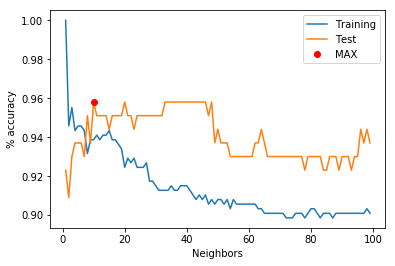

0.958041958041958
Result By Random Forest Classifier
1 0.9345238095238095 0.974937343358396
2 0.9642857142857143 0.9799498746867168
3 0.9166666666666666 0.9924812030075187
4 0.9583333333333334 0.9899749373433584
5 0.9345238095238095 1.0
6 0.9583333333333334 0.9924812030075187
7 0.9464285714285714 0.9974937343358395
8 0.9702380952380952 0.9974937343358395
9 0.9523809523809523 1.0
10 0.9583333333333334 1.0
11 0.9583333333333334 1.0
12 0.9523809523809523 0.9974937343358395
13 0.9464285714285714 1.0
14 0.9523809523809523 1.0
15 0.9464285714285714 1.0
16 0.9583333333333334 1.0
17 0.9523809523809523 1.0
18 0.9642857142857143 1.0
19 0.9583333333333334 1.0
Max Accuracy 0.9702380952380952At Estimators = 8


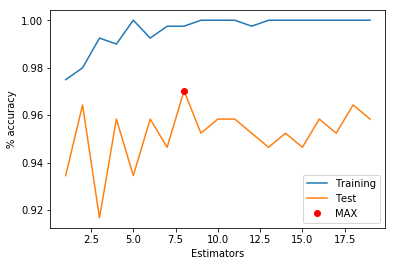

400 0.9702380952380952
Result By Random Forest Classifier
1 0.9345238095238095 0.974937343358396
2 0.9642857142857143 0.9799498746867168
3 0.9166666666666666 0.9924812030075187
4 0.9583333333333334 0.9899749373433584
5 0.9345238095238095 1.0
6 0.9583333333333334 0.9924812030075187
7 0.9464285714285714 0.9974937343358395
8 0.9702380952380952 0.9974937343358395
9 0.9523809523809523 1.0
10 0.9583333333333334 1.0
11 0.9583333333333334 1.0
12 0.9523809523809523 0.9974937343358395
13 0.9464285714285714 1.0
14 0.9523809523809523 1.0
15 0.9464285714285714 1.0
16 0.9583333333333334 1.0
17 0.9523809523809523 1.0
18 0.9642857142857143 1.0
19 0.9583333333333334 1.0
Max Accuracy 0.9702380952380952At Estimators = 8


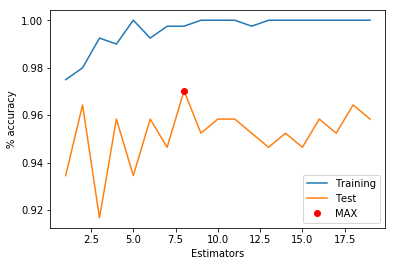

Result By Random Forest Classifier
1 0.9325153374233128 0.9752475247524752
2 0.9631901840490797 0.9801980198019802
3 0.9141104294478528 0.9925742574257426
4 0.9570552147239264 0.9900990099009901
5 0.9325153374233128 1.0
6 0.9570552147239264 0.9925742574257426
7 0.9447852760736196 0.9975247524752475
8 0.9693251533742331 0.9975247524752475
9 0.950920245398773 1.0
10 0.9570552147239264 1.0
11 0.9570552147239264 1.0
12 0.950920245398773 0.9975247524752475
13 0.9447852760736196 1.0
14 0.950920245398773 1.0
15 0.9447852760736196 1.0
16 0.9570552147239264 1.0
17 0.950920245398773 1.0
18 0.9631901840490797 1.0
19 0.9570552147239264 1.0
Max Accuracy 0.9693251533742331At Estimators = 8


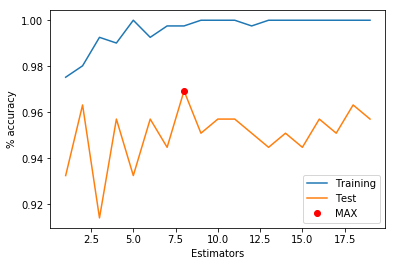

405 0.9693251533742331
Result By Random Forest Classifier
1 0.9325153374233128 0.9752475247524752
2 0.9631901840490797 0.9801980198019802
3 0.9141104294478528 0.9925742574257426
4 0.9570552147239264 0.9900990099009901
5 0.9325153374233128 1.0
6 0.9570552147239264 0.9925742574257426
7 0.9447852760736196 0.9975247524752475
8 0.9693251533742331 0.9975247524752475
9 0.950920245398773 1.0
10 0.9570552147239264 1.0
11 0.9570552147239264 1.0
12 0.950920245398773 0.9975247524752475
13 0.9447852760736196 1.0
14 0.950920245398773 1.0
15 0.9447852760736196 1.0
16 0.9570552147239264 1.0
17 0.950920245398773 1.0
18 0.9631901840490797 1.0
19 0.9570552147239264 1.0
Max Accuracy 0.9693251533742331At Estimators = 8


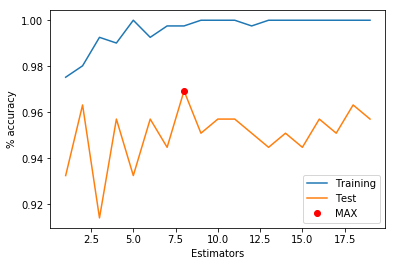

Result By Random Forest Classifier
1 0.930379746835443 0.9755501222493888
2 0.9620253164556962 0.980440097799511
3 0.9113924050632911 0.9926650366748166
4 0.9556962025316456 0.9902200488997555
5 0.930379746835443 1.0
6 0.9556962025316456 0.9926650366748166
7 0.9430379746835443 0.9975550122249389
8 0.9683544303797469 0.9975550122249389
9 0.9493670886075949 1.0
10 0.9556962025316456 1.0
11 0.9556962025316456 1.0
12 0.9493670886075949 0.9975550122249389
13 0.9430379746835443 1.0
14 0.9493670886075949 1.0
15 0.9430379746835443 1.0
16 0.9556962025316456 1.0
17 0.9493670886075949 1.0
18 0.9620253164556962 1.0
19 0.9620253164556962 1.0
Max Accuracy 0.9683544303797469At Estimators = 8


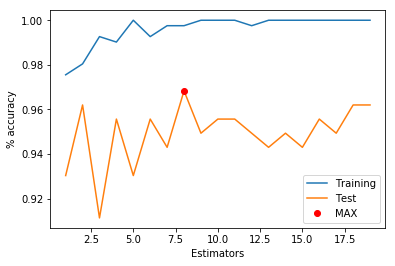

410 0.9683544303797469
Result By Random Forest Classifier
1 0.930379746835443 0.9755501222493888
2 0.9620253164556962 0.980440097799511
3 0.9113924050632911 0.9926650366748166
4 0.9556962025316456 0.9902200488997555
5 0.930379746835443 1.0
6 0.9556962025316456 0.9926650366748166
7 0.9430379746835443 0.9975550122249389
8 0.9683544303797469 0.9975550122249389
9 0.9493670886075949 1.0
10 0.9556962025316456 1.0
11 0.9556962025316456 1.0
12 0.9493670886075949 0.9975550122249389
13 0.9430379746835443 1.0
14 0.9493670886075949 1.0
15 0.9430379746835443 1.0
16 0.9556962025316456 1.0
17 0.9493670886075949 1.0
18 0.9620253164556962 1.0
19 0.9620253164556962 1.0
Max Accuracy 0.9683544303797469At Estimators = 8


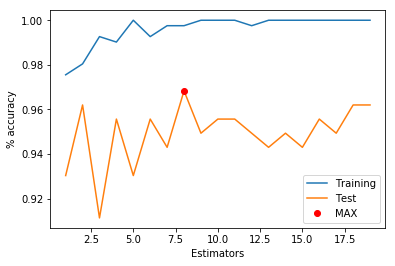

Result By Random Forest Classifier
1 0.934640522875817 0.9734299516908212
2 0.9738562091503268 0.9782608695652174
3 0.934640522875817 0.9927536231884058
4 0.9673202614379085 0.9879227053140096
5 0.9477124183006536 1.0
6 0.9738562091503268 0.9903381642512077
7 0.9673202614379085 0.9975845410628019
8 0.9934640522875817 0.9975845410628019
9 0.9673202614379085 0.9975845410628019
10 0.9934640522875817 1.0
11 0.9738562091503268 1.0
12 0.9869281045751634 0.9975845410628019
13 0.9869281045751634 1.0
14 0.9869281045751634 1.0
15 0.9869281045751634 1.0
16 0.9869281045751634 1.0
17 0.9869281045751634 1.0
18 0.9869281045751634 1.0
19 0.9869281045751634 1.0
Max Accuracy 0.9934640522875817At Estimators = 8


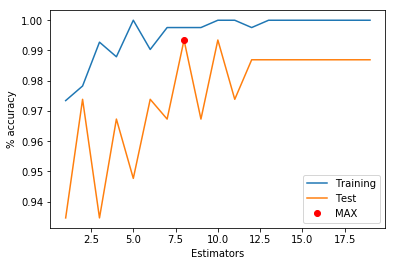

415 0.9934640522875817
Result By Random Forest Classifier
1 0.934640522875817 0.9734299516908212
2 0.9738562091503268 0.9782608695652174
3 0.934640522875817 0.9927536231884058
4 0.9673202614379085 0.9879227053140096
5 0.9477124183006536 1.0
6 0.9738562091503268 0.9903381642512077
7 0.9673202614379085 0.9975845410628019
8 0.9934640522875817 0.9975845410628019
9 0.9673202614379085 0.9975845410628019
10 0.9934640522875817 1.0
11 0.9738562091503268 1.0
12 0.9869281045751634 0.9975845410628019
13 0.9869281045751634 1.0
14 0.9869281045751634 1.0
15 0.9869281045751634 1.0
16 0.9869281045751634 1.0
17 0.9869281045751634 1.0
18 0.9869281045751634 1.0
19 0.9869281045751634 1.0
Max Accuracy 0.9934640522875817At Estimators = 8


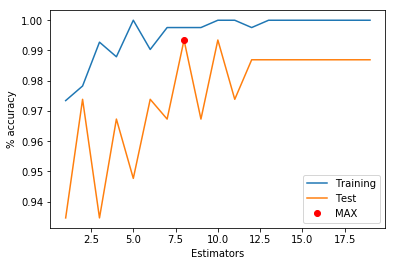

Result By Random Forest Classifier
1 0.9324324324324325 0.9737470167064439
2 0.972972972972973 0.9785202863961814
3 0.9324324324324325 0.9928400954653938
4 0.9662162162162162 0.9880668257756563
5 0.9391891891891891 1.0
6 0.9594594594594594 0.9904534606205251
7 0.9594594594594594 0.9976133651551312
8 0.9864864864864865 0.9976133651551312
9 0.972972972972973 0.9976133651551312
10 0.9864864864864865 1.0
11 0.972972972972973 1.0
12 0.9864864864864865 0.9976133651551312
13 0.9864864864864865 1.0
14 0.9864864864864865 1.0
15 0.9864864864864865 1.0
16 0.9864864864864865 1.0
17 0.9797297297297297 1.0
18 0.9864864864864865 1.0
19 0.9797297297297297 1.0
Max Accuracy 0.9864864864864865At Estimators = 8


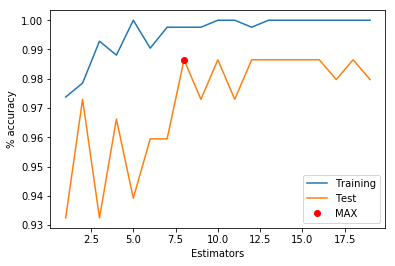

420 0.9864864864864865
Result By Random Forest Classifier
1 0.9324324324324325 0.9737470167064439
2 0.972972972972973 0.9785202863961814
3 0.9324324324324325 0.9928400954653938
4 0.9662162162162162 0.9880668257756563
5 0.9391891891891891 1.0
6 0.9594594594594594 0.9904534606205251
7 0.9594594594594594 0.9976133651551312
8 0.9864864864864865 0.9976133651551312
9 0.972972972972973 0.9976133651551312
10 0.9864864864864865 1.0
11 0.972972972972973 1.0
12 0.9864864864864865 0.9976133651551312
13 0.9864864864864865 1.0
14 0.9864864864864865 1.0
15 0.9864864864864865 1.0
16 0.9864864864864865 1.0
17 0.9797297297297297 1.0
18 0.9864864864864865 1.0
19 0.9797297297297297 1.0
Max Accuracy 0.9864864864864865At Estimators = 8


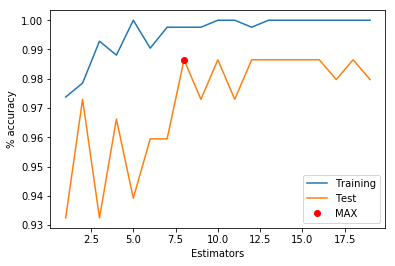

Result By Random Forest Classifier
1 0.9440559440559441 0.9716981132075472
2 0.972027972027972 0.9764150943396226
3 0.9440559440559441 0.9929245283018868
4 0.965034965034965 0.9834905660377359
5 0.965034965034965 0.9929245283018868
6 0.972027972027972 0.9882075471698113
7 0.9790209790209791 0.9905660377358491
8 0.986013986013986 0.9905660377358491
9 0.986013986013986 0.9952830188679245
10 0.986013986013986 0.9952830188679245
11 0.993006993006993 0.9976415094339622
12 0.986013986013986 0.9976415094339622
13 0.993006993006993 0.9976415094339622
14 0.993006993006993 0.9976415094339622
15 0.993006993006993 0.9976415094339622
16 0.993006993006993 0.9976415094339622
17 0.993006993006993 0.9976415094339622
18 0.993006993006993 0.9976415094339622
19 0.993006993006993 0.9976415094339622
Max Accuracy 0.993006993006993At Estimators = 11


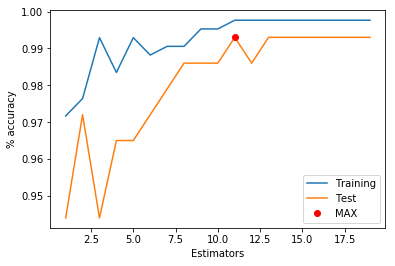

425 0.993006993006993
Result By Random Forest Classifier
1 0.9440559440559441 0.9716981132075472
2 0.972027972027972 0.9764150943396226
3 0.9440559440559441 0.9929245283018868
4 0.965034965034965 0.9834905660377359
5 0.965034965034965 0.9929245283018868
6 0.972027972027972 0.9882075471698113
7 0.9790209790209791 0.9905660377358491
8 0.986013986013986 0.9905660377358491
9 0.986013986013986 0.9952830188679245
10 0.986013986013986 0.9952830188679245
11 0.993006993006993 0.9976415094339622
12 0.986013986013986 0.9976415094339622
13 0.993006993006993 0.9976415094339622
14 0.993006993006993 0.9976415094339622
15 0.993006993006993 0.9976415094339622
16 0.993006993006993 0.9976415094339622
17 0.993006993006993 0.9976415094339622
18 0.993006993006993 0.9976415094339622
19 0.993006993006993 0.9976415094339622
Max Accuracy 0.993006993006993At Estimators = 11


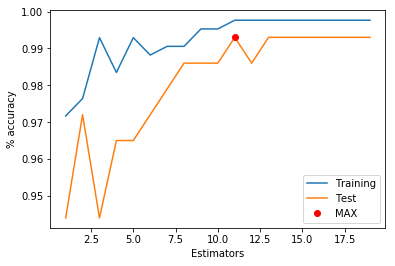

Result By Random Forest Classifier
1 0.9420289855072463 0.972027972027972
2 0.9782608695652174 0.9766899766899767
3 0.9492753623188406 0.993006993006993
4 0.9710144927536232 0.9836829836829837
5 0.9782608695652174 0.9906759906759907
6 0.9782608695652174 0.9883449883449883
7 0.9782608695652174 0.9906759906759907
8 0.9855072463768116 0.9906759906759907
9 0.9855072463768116 0.993006993006993
10 0.9710144927536232 0.993006993006993
11 0.9855072463768116 0.9976689976689976
12 0.9782608695652174 0.9976689976689976
13 0.9782608695652174 0.9976689976689976
14 0.9782608695652174 0.9976689976689976
15 0.9855072463768116 0.9976689976689976
16 0.9855072463768116 0.9976689976689976
17 0.9855072463768116 0.9976689976689976
18 0.9782608695652174 0.9976689976689976
19 0.9855072463768116 0.9976689976689976
Max Accuracy 0.9855072463768116At Estimators = 8


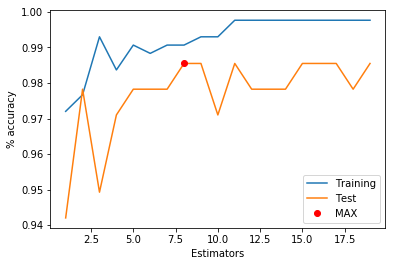

430 0.9855072463768116
Result By Random Forest Classifier
1 0.9420289855072463 0.972027972027972
2 0.9782608695652174 0.9766899766899767
3 0.9492753623188406 0.993006993006993
4 0.9710144927536232 0.9836829836829837
5 0.9782608695652174 0.9906759906759907
6 0.9782608695652174 0.9883449883449883
7 0.9782608695652174 0.9906759906759907
8 0.9855072463768116 0.9906759906759907
9 0.9855072463768116 0.993006993006993
10 0.9710144927536232 0.993006993006993
11 0.9855072463768116 0.9976689976689976
12 0.9782608695652174 0.9976689976689976
13 0.9782608695652174 0.9976689976689976
14 0.9782608695652174 0.9976689976689976
15 0.9855072463768116 0.9976689976689976
16 0.9855072463768116 0.9976689976689976
17 0.9855072463768116 0.9976689976689976
18 0.9782608695652174 0.9976689976689976
19 0.9855072463768116 0.9976689976689976
Max Accuracy 0.9855072463768116At Estimators = 8


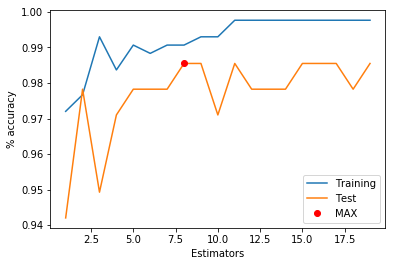

Result By Random Forest Classifier
1 0.9624060150375939 0.9746543778801844
2 0.9774436090225563 0.9700460829493087
3 0.9548872180451128 0.9930875576036866
4 0.9849624060150376 0.9861751152073732
5 0.9774436090225563 0.9953917050691244
6 0.9849624060150376 0.9930875576036866
7 0.9849624060150376 0.9953917050691244
8 0.9924812030075187 0.9953917050691244
9 0.9924812030075187 0.9976958525345622
10 0.9849624060150376 0.9976958525345622
11 0.9924812030075187 0.9976958525345622
12 0.9849624060150376 0.9976958525345622
13 0.9849624060150376 0.9976958525345622
14 0.9849624060150376 0.9976958525345622
15 0.9849624060150376 0.9976958525345622
16 0.9849624060150376 0.9976958525345622
17 0.9849624060150376 0.9976958525345622
18 0.9849624060150376 0.9976958525345622
19 0.9924812030075187 0.9976958525345622
Max Accuracy 0.9924812030075187At Estimators = 8


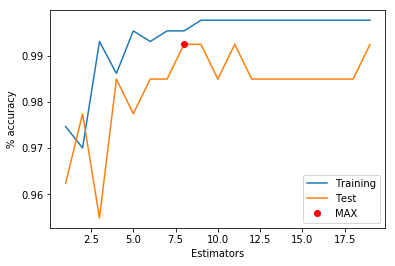

435 0.9924812030075187
Result By Random Forest Classifier
1 0.9624060150375939 0.9746543778801844
2 0.9774436090225563 0.9700460829493087
3 0.9548872180451128 0.9930875576036866
4 0.9849624060150376 0.9861751152073732
5 0.9774436090225563 0.9953917050691244
6 0.9849624060150376 0.9930875576036866
7 0.9849624060150376 0.9953917050691244
8 0.9924812030075187 0.9953917050691244
9 0.9924812030075187 0.9976958525345622
10 0.9849624060150376 0.9976958525345622
11 0.9924812030075187 0.9976958525345622
12 0.9849624060150376 0.9976958525345622
13 0.9849624060150376 0.9976958525345622
14 0.9849624060150376 0.9976958525345622
15 0.9849624060150376 0.9976958525345622
16 0.9849624060150376 0.9976958525345622
17 0.9849624060150376 0.9976958525345622
18 0.9849624060150376 0.9976958525345622
19 0.9924812030075187 0.9976958525345622
Max Accuracy 0.9924812030075187At Estimators = 8


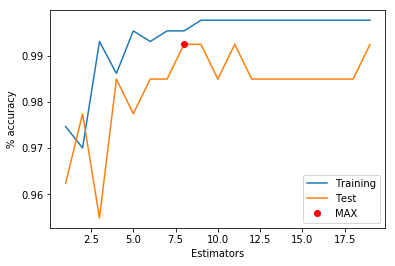

Result By Random Forest Classifier
1 0.953125 0.9749430523917996
2 0.96875 0.9703872437357631
3 0.953125 0.9931662870159453
4 0.96875 0.9908883826879271
5 0.96875 0.9908883826879271
6 0.96875 0.9886104783599089
7 0.96875 0.9954441913439636
8 0.9765625 0.9954441913439636
9 0.9765625 0.9977220956719818
10 0.9765625 0.9977220956719818
11 0.9765625 0.9977220956719818
12 0.9765625 0.9977220956719818
13 0.9765625 0.9977220956719818
14 0.9765625 0.9977220956719818
15 0.9765625 0.9977220956719818
16 0.984375 0.9977220956719818
17 0.984375 0.9977220956719818
18 0.984375 0.9977220956719818
19 0.9765625 0.9977220956719818
Max Accuracy 0.984375At Estimators = 16


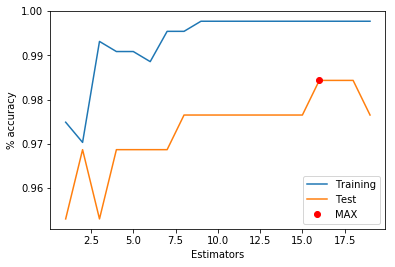

440 0.984375
Result By Random Forest Classifier
1 0.953125 0.9749430523917996
2 0.96875 0.9703872437357631
3 0.953125 0.9931662870159453
4 0.96875 0.9908883826879271
5 0.96875 0.9908883826879271
6 0.96875 0.9886104783599089
7 0.96875 0.9954441913439636
8 0.9765625 0.9954441913439636
9 0.9765625 0.9977220956719818
10 0.9765625 0.9977220956719818
11 0.9765625 0.9977220956719818
12 0.9765625 0.9977220956719818
13 0.9765625 0.9977220956719818
14 0.9765625 0.9977220956719818
15 0.9765625 0.9977220956719818
16 0.984375 0.9977220956719818
17 0.984375 0.9977220956719818
18 0.984375 0.9977220956719818
19 0.9765625 0.9977220956719818
Max Accuracy 0.984375At Estimators = 16


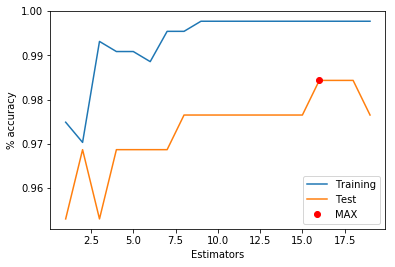

Result By Random Forest Classifier
1 0.9512195121951219 0.9752252252252253
2 0.967479674796748 0.9707207207207207
3 0.9512195121951219 0.9932432432432432
4 0.967479674796748 0.990990990990991
5 0.967479674796748 0.990990990990991
6 0.967479674796748 0.9887387387387387
7 0.967479674796748 0.9932432432432432
8 0.975609756097561 0.9932432432432432
9 0.975609756097561 0.9977477477477478
10 0.983739837398374 0.9977477477477478
11 0.983739837398374 0.9977477477477478
12 0.983739837398374 0.9977477477477478
13 0.983739837398374 0.9977477477477478
14 0.983739837398374 0.9977477477477478
15 0.983739837398374 0.9977477477477478
16 0.983739837398374 0.9977477477477478
17 0.983739837398374 0.9977477477477478
18 0.983739837398374 0.9977477477477478
19 0.983739837398374 0.9977477477477478
Max Accuracy 0.983739837398374At Estimators = 10


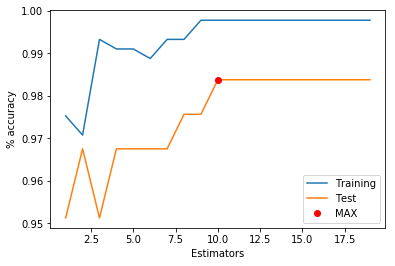

445 0.983739837398374
Result By Random Forest Classifier
1 0.9512195121951219 0.9752252252252253
2 0.967479674796748 0.9707207207207207
3 0.9512195121951219 0.9932432432432432
4 0.967479674796748 0.990990990990991
5 0.967479674796748 0.990990990990991
6 0.967479674796748 0.9887387387387387
7 0.967479674796748 0.9932432432432432
8 0.975609756097561 0.9932432432432432
9 0.975609756097561 0.9977477477477478
10 0.983739837398374 0.9977477477477478
11 0.983739837398374 0.9977477477477478
12 0.983739837398374 0.9977477477477478
13 0.983739837398374 0.9977477477477478
14 0.983739837398374 0.9977477477477478
15 0.983739837398374 0.9977477477477478
16 0.983739837398374 0.9977477477477478
17 0.983739837398374 0.9977477477477478
18 0.983739837398374 0.9977477477477478
19 0.983739837398374 0.9977477477477478
Max Accuracy 0.983739837398374At Estimators = 10


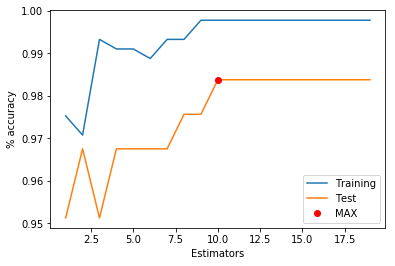

Result By Random Forest Classifier
1 0.9491525423728814 0.9755011135857461
2 0.9661016949152542 0.9710467706013363
3 0.9491525423728814 0.9933184855233853
4 0.9830508474576272 0.9866369710467706
5 0.9830508474576272 0.9955456570155902
6 0.9830508474576272 0.9933184855233853
7 0.9830508474576272 0.9955456570155902
8 0.9745762711864406 0.9933184855233853
9 0.9830508474576272 0.9977728285077951
10 0.9830508474576272 0.9977728285077951
11 0.9915254237288136 0.9977728285077951
12 0.9915254237288136 0.9977728285077951
13 0.9830508474576272 0.9977728285077951
14 0.9830508474576272 0.9977728285077951
15 0.9745762711864406 0.9977728285077951
16 0.9915254237288136 0.9977728285077951
17 0.9915254237288136 0.9977728285077951
18 0.9915254237288136 0.9977728285077951
19 0.9830508474576272 0.9977728285077951
Max Accuracy 0.9915254237288136At Estimators = 11


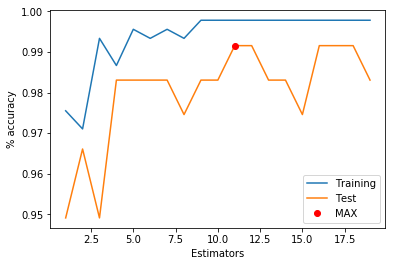

450 0.9915254237288136
Result By Random Forest Classifier
1 0.9491525423728814 0.9755011135857461
2 0.9661016949152542 0.9710467706013363
3 0.9491525423728814 0.9933184855233853
4 0.9830508474576272 0.9866369710467706
5 0.9830508474576272 0.9955456570155902
6 0.9830508474576272 0.9933184855233853
7 0.9830508474576272 0.9955456570155902
8 0.9745762711864406 0.9933184855233853
9 0.9830508474576272 0.9977728285077951
10 0.9830508474576272 0.9977728285077951
11 0.9915254237288136 0.9977728285077951
12 0.9915254237288136 0.9977728285077951
13 0.9830508474576272 0.9977728285077951
14 0.9830508474576272 0.9977728285077951
15 0.9745762711864406 0.9977728285077951
16 0.9915254237288136 0.9977728285077951
17 0.9915254237288136 0.9977728285077951
18 0.9915254237288136 0.9977728285077951
19 0.9830508474576272 0.9977728285077951
Max Accuracy 0.9915254237288136At Estimators = 11


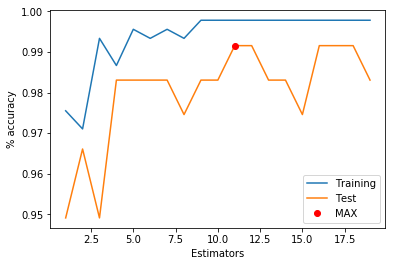

Result By Random Forest Classifier
1 0.9469026548672567 0.9757709251101322
2 0.9646017699115044 0.9713656387665198
3 0.9292035398230089 0.9933920704845814
4 0.9557522123893806 0.9823788546255506
5 0.9646017699115044 0.9977973568281938
6 0.9646017699115044 0.9933920704845814
7 0.9646017699115044 0.9955947136563876
8 0.9646017699115044 0.9955947136563876
9 0.9646017699115044 0.9955947136563876
10 0.9646017699115044 0.9955947136563876
11 0.9646017699115044 0.9977973568281938
12 0.9646017699115044 0.9977973568281938
13 0.9646017699115044 1.0
14 0.9646017699115044 0.9977973568281938
15 0.9734513274336283 1.0
16 0.9734513274336283 1.0
17 0.9734513274336283 1.0
18 0.9646017699115044 0.9977973568281938
19 0.9646017699115044 0.9977973568281938
Max Accuracy 0.9734513274336283At Estimators = 15


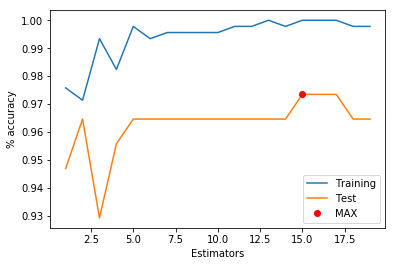

455 0.9734513274336283
Result By Random Forest Classifier
1 0.9469026548672567 0.9757709251101322
2 0.9646017699115044 0.9713656387665198
3 0.9292035398230089 0.9933920704845814
4 0.9557522123893806 0.9823788546255506
5 0.9646017699115044 0.9977973568281938
6 0.9646017699115044 0.9933920704845814
7 0.9646017699115044 0.9955947136563876
8 0.9646017699115044 0.9955947136563876
9 0.9646017699115044 0.9955947136563876
10 0.9646017699115044 0.9955947136563876
11 0.9646017699115044 0.9977973568281938
12 0.9646017699115044 0.9977973568281938
13 0.9646017699115044 1.0
14 0.9646017699115044 0.9977973568281938
15 0.9734513274336283 1.0
16 0.9734513274336283 1.0
17 0.9734513274336283 1.0
18 0.9646017699115044 0.9977973568281938
19 0.9646017699115044 0.9977973568281938
Max Accuracy 0.9734513274336283At Estimators = 15


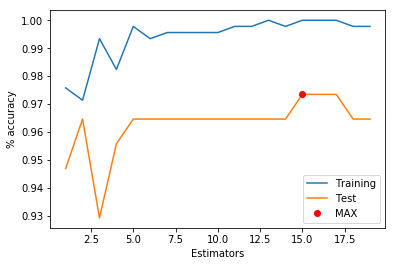

Result By Random Forest Classifier
1 0.9444444444444444 0.9782135076252724
2 0.9629629629629629 0.9738562091503268
3 0.9351851851851852 0.9912854030501089
4 0.9537037037037037 0.9847494553376906
5 0.9629629629629629 0.9956427015250545
6 0.9629629629629629 0.9912854030501089
7 0.9629629629629629 0.9956427015250545
8 0.9629629629629629 0.9956427015250545
9 0.9444444444444444 0.9956427015250545
10 0.9629629629629629 0.9956427015250545
11 0.9629629629629629 0.9978213507625272
12 0.9629629629629629 0.9978213507625272
13 0.9537037037037037 1.0
14 0.9537037037037037 0.9978213507625272
15 0.9629629629629629 1.0
16 0.9629629629629629 1.0
17 0.9629629629629629 1.0
18 0.9629629629629629 0.9978213507625272
19 0.9537037037037037 0.9978213507625272
Max Accuracy 0.9629629629629629At Estimators = 2


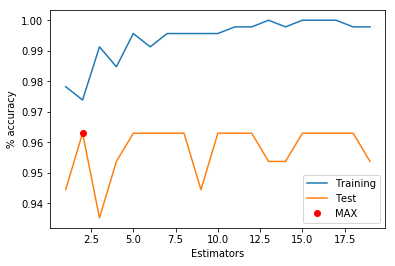

460 0.9629629629629629
Result By Random Forest Classifier
1 0.9444444444444444 0.9782135076252724
2 0.9629629629629629 0.9738562091503268
3 0.9351851851851852 0.9912854030501089
4 0.9537037037037037 0.9847494553376906
5 0.9629629629629629 0.9956427015250545
6 0.9629629629629629 0.9912854030501089
7 0.9629629629629629 0.9956427015250545
8 0.9629629629629629 0.9956427015250545
9 0.9444444444444444 0.9956427015250545
10 0.9629629629629629 0.9956427015250545
11 0.9629629629629629 0.9978213507625272
12 0.9629629629629629 0.9978213507625272
13 0.9537037037037037 1.0
14 0.9537037037037037 0.9978213507625272
15 0.9629629629629629 1.0
16 0.9629629629629629 1.0
17 0.9629629629629629 1.0
18 0.9629629629629629 0.9978213507625272
19 0.9537037037037037 0.9978213507625272
Max Accuracy 0.9629629629629629At Estimators = 2


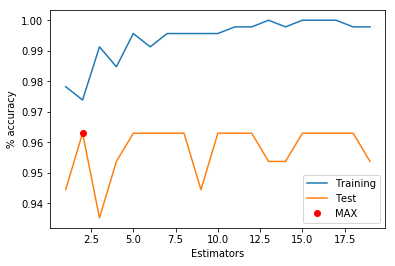

Result By Random Forest Classifier
1 0.941747572815534 0.978448275862069
2 0.9611650485436893 0.9741379310344828
3 0.9514563106796117 0.9935344827586207
4 0.970873786407767 0.9870689655172413
5 0.970873786407767 0.9956896551724138
6 0.970873786407767 0.9892241379310345
7 0.970873786407767 0.9935344827586207
8 0.9611650485436893 0.9935344827586207
9 0.970873786407767 0.9956896551724138
10 0.9611650485436893 0.9956896551724138
11 0.970873786407767 0.9978448275862069
12 0.9611650485436893 0.9978448275862069
13 0.9611650485436893 1.0
14 0.9611650485436893 0.9978448275862069
15 0.9611650485436893 1.0
16 0.970873786407767 1.0
17 0.970873786407767 1.0
18 0.9611650485436893 0.9978448275862069
19 0.970873786407767 0.9978448275862069
Max Accuracy 0.970873786407767At Estimators = 4


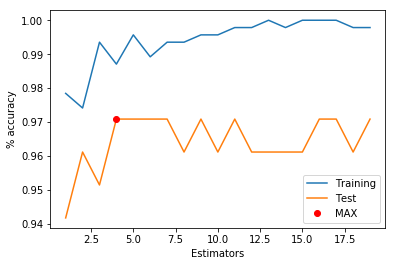

465 0.970873786407767
Result By Random Forest Classifier
1 0.941747572815534 0.978448275862069
2 0.9611650485436893 0.9741379310344828
3 0.9514563106796117 0.9935344827586207
4 0.970873786407767 0.9870689655172413
5 0.970873786407767 0.9956896551724138
6 0.970873786407767 0.9892241379310345
7 0.970873786407767 0.9935344827586207
8 0.9611650485436893 0.9935344827586207
9 0.970873786407767 0.9956896551724138
10 0.9611650485436893 0.9956896551724138
11 0.970873786407767 0.9978448275862069
12 0.9611650485436893 0.9978448275862069
13 0.9611650485436893 1.0
14 0.9611650485436893 0.9978448275862069
15 0.9611650485436893 1.0
16 0.970873786407767 1.0
17 0.970873786407767 1.0
18 0.9611650485436893 0.9978448275862069
19 0.970873786407767 0.9978448275862069
Max Accuracy 0.970873786407767At Estimators = 4


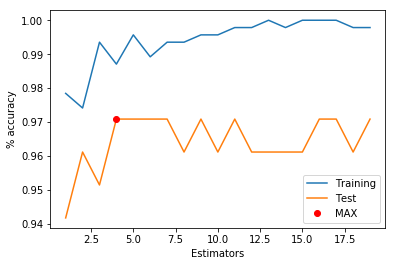

Result By Random Forest Classifier
1 0.9387755102040817 0.976545842217484
2 0.9591836734693877 0.9722814498933902
3 0.9285714285714286 0.9893390191897654
4 0.9489795918367347 0.9872068230277186
5 0.9591836734693877 0.9957356076759062
6 0.9591836734693877 0.9914712153518124
7 0.9591836734693877 0.9957356076759062
8 0.9591836734693877 0.9957356076759062
9 0.9489795918367347 0.9957356076759062
10 0.9591836734693877 0.9957356076759062
11 0.9591836734693877 0.997867803837953
12 0.9591836734693877 0.997867803837953
13 0.9489795918367347 1.0
14 0.9489795918367347 0.997867803837953
15 0.9591836734693877 1.0
16 0.9591836734693877 1.0
17 0.9591836734693877 1.0
18 0.9591836734693877 0.997867803837953
19 0.9489795918367347 0.997867803837953
Max Accuracy 0.9591836734693877At Estimators = 2


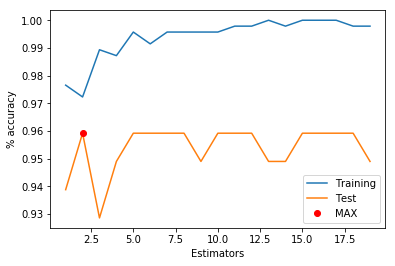

470 0.9591836734693877
Result By Random Forest Classifier
1 0.9387755102040817 0.976545842217484
2 0.9591836734693877 0.9722814498933902
3 0.9285714285714286 0.9893390191897654
4 0.9489795918367347 0.9872068230277186
5 0.9591836734693877 0.9957356076759062
6 0.9591836734693877 0.9914712153518124
7 0.9591836734693877 0.9957356076759062
8 0.9591836734693877 0.9957356076759062
9 0.9489795918367347 0.9957356076759062
10 0.9591836734693877 0.9957356076759062
11 0.9591836734693877 0.997867803837953
12 0.9591836734693877 0.997867803837953
13 0.9489795918367347 1.0
14 0.9489795918367347 0.997867803837953
15 0.9591836734693877 1.0
16 0.9591836734693877 1.0
17 0.9591836734693877 1.0
18 0.9591836734693877 0.997867803837953
19 0.9489795918367347 0.997867803837953
Max Accuracy 0.9591836734693877At Estimators = 2


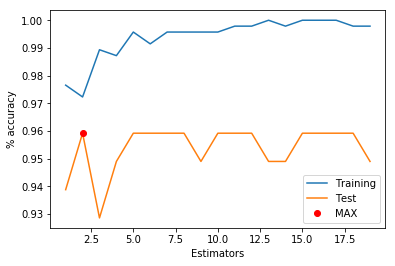

Result By Random Forest Classifier
1 0.9354838709677419 0.9767932489451476
2 0.956989247311828 0.9725738396624473
3 0.946236559139785 0.9936708860759493
4 0.946236559139785 0.989451476793249
5 0.956989247311828 0.9957805907172996
6 0.956989247311828 0.9915611814345991
7 0.956989247311828 0.9957805907172996
8 0.956989247311828 0.9936708860759493
9 0.956989247311828 0.9957805907172996
10 0.956989247311828 0.9957805907172996
11 0.956989247311828 0.9978902953586498
12 0.956989247311828 0.9978902953586498
13 0.956989247311828 1.0
14 0.956989247311828 0.9978902953586498
15 0.967741935483871 1.0
16 0.967741935483871 1.0
17 0.967741935483871 1.0
18 0.956989247311828 0.9978902953586498
19 0.956989247311828 0.9978902953586498
Max Accuracy 0.967741935483871At Estimators = 15


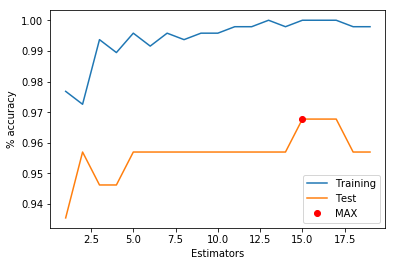

475 0.967741935483871
Result By Random Forest Classifier
1 0.9354838709677419 0.9767932489451476
2 0.956989247311828 0.9725738396624473
3 0.946236559139785 0.9936708860759493
4 0.946236559139785 0.989451476793249
5 0.956989247311828 0.9957805907172996
6 0.956989247311828 0.9915611814345991
7 0.956989247311828 0.9957805907172996
8 0.956989247311828 0.9936708860759493
9 0.956989247311828 0.9957805907172996
10 0.956989247311828 0.9957805907172996
11 0.956989247311828 0.9978902953586498
12 0.956989247311828 0.9978902953586498
13 0.956989247311828 1.0
14 0.956989247311828 0.9978902953586498
15 0.967741935483871 1.0
16 0.967741935483871 1.0
17 0.967741935483871 1.0
18 0.956989247311828 0.9978902953586498
19 0.956989247311828 0.9978902953586498
Max Accuracy 0.967741935483871At Estimators = 15


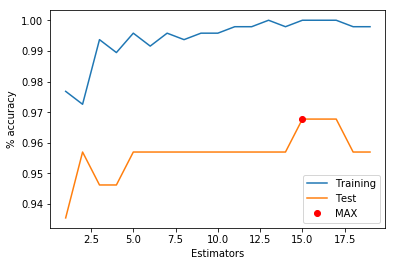

Result By Random Forest Classifier
1 0.9318181818181818 0.9770354906054279
2 0.9545454545454546 0.9728601252609603
3 0.9431818181818182 0.9937369519832986
4 0.9545454545454546 0.9895615866388309
5 0.9545454545454546 0.9958246346555324
6 0.9659090909090909 0.9916492693110647
7 0.9659090909090909 0.9958246346555324
8 0.9545454545454546 0.9937369519832986
9 0.9659090909090909 0.9958246346555324
10 0.9659090909090909 0.9958246346555324
11 0.9659090909090909 0.9979123173277662
12 0.9545454545454546 0.9979123173277662
13 0.9545454545454546 1.0
14 0.9545454545454546 1.0
15 0.9772727272727273 1.0
16 0.9772727272727273 1.0
17 0.9772727272727273 1.0
18 0.9659090909090909 1.0
19 0.9659090909090909 1.0
Max Accuracy 0.9772727272727273At Estimators = 15


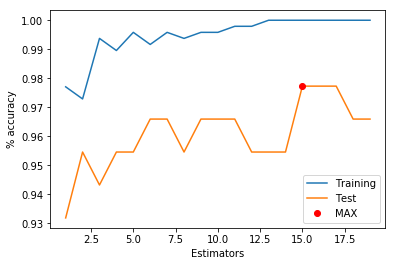

480 0.9772727272727273
Result By Random Forest Classifier
1 0.9318181818181818 0.9770354906054279
2 0.9545454545454546 0.9728601252609603
3 0.9431818181818182 0.9937369519832986
4 0.9545454545454546 0.9895615866388309
5 0.9545454545454546 0.9958246346555324
6 0.9659090909090909 0.9916492693110647
7 0.9659090909090909 0.9958246346555324
8 0.9545454545454546 0.9937369519832986
9 0.9659090909090909 0.9958246346555324
10 0.9659090909090909 0.9958246346555324
11 0.9659090909090909 0.9979123173277662
12 0.9545454545454546 0.9979123173277662
13 0.9545454545454546 1.0
14 0.9545454545454546 1.0
15 0.9772727272727273 1.0
16 0.9772727272727273 1.0
17 0.9772727272727273 1.0
18 0.9659090909090909 1.0
19 0.9659090909090909 1.0
Max Accuracy 0.9772727272727273At Estimators = 15


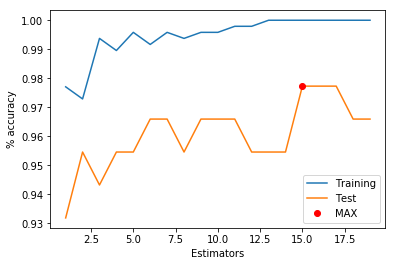

Result By Random Forest Classifier
1 0.9397590361445783 0.9752066115702479
2 0.9397590361445783 0.9752066115702479
3 0.927710843373494 1.0
4 0.963855421686747 0.987603305785124
5 0.963855421686747 0.9979338842975206
6 0.963855421686747 0.993801652892562
7 0.963855421686747 0.9958677685950413
8 0.9518072289156626 0.9958677685950413
9 0.963855421686747 0.9958677685950413
10 0.9759036144578314 0.9958677685950413
11 0.9879518072289156 0.9979338842975206
12 0.9879518072289156 0.9979338842975206
13 0.9759036144578314 0.9979338842975206
14 0.9759036144578314 0.9979338842975206
15 0.9879518072289156 1.0
16 0.9759036144578314 1.0
17 0.9879518072289156 1.0
18 0.9759036144578314 1.0
19 0.9759036144578314 1.0
Max Accuracy 0.9879518072289156At Estimators = 11


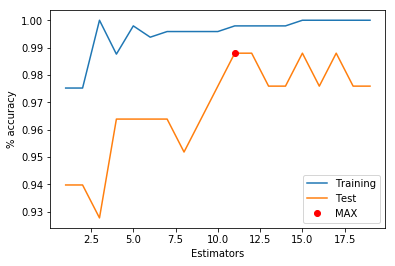

485 0.9879518072289156
Result By Random Forest Classifier
1 0.9397590361445783 0.9752066115702479
2 0.9397590361445783 0.9752066115702479
3 0.927710843373494 1.0
4 0.963855421686747 0.987603305785124
5 0.963855421686747 0.9979338842975206
6 0.963855421686747 0.993801652892562
7 0.963855421686747 0.9958677685950413
8 0.9518072289156626 0.9958677685950413
9 0.963855421686747 0.9958677685950413
10 0.9759036144578314 0.9958677685950413
11 0.9879518072289156 0.9979338842975206
12 0.9879518072289156 0.9979338842975206
13 0.9759036144578314 0.9979338842975206
14 0.9759036144578314 0.9979338842975206
15 0.9879518072289156 1.0
16 0.9759036144578314 1.0
17 0.9879518072289156 1.0
18 0.9759036144578314 1.0
19 0.9759036144578314 1.0
Max Accuracy 0.9879518072289156At Estimators = 11


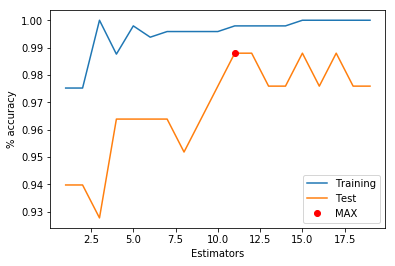

Result By Random Forest Classifier
1 0.9358974358974359 0.9754601226993865
2 0.9743589743589743 0.9795501022494888
3 0.9358974358974359 1.0
4 0.9871794871794872 0.9877300613496932
5 0.9615384615384616 0.9979550102249489
6 0.9743589743589743 0.9938650306748467
7 0.9743589743589743 0.9959100204498977
8 0.9743589743589743 0.9938650306748467
9 0.9743589743589743 0.9959100204498977
10 0.9743589743589743 0.9959100204498977
11 0.9871794871794872 0.9979550102249489
12 0.9743589743589743 0.9979550102249489
13 0.9871794871794872 1.0
14 0.9871794871794872 0.9979550102249489
15 0.9871794871794872 1.0
16 0.9871794871794872 1.0
17 0.9871794871794872 1.0
18 0.9871794871794872 0.9979550102249489
19 0.9871794871794872 0.9979550102249489
Max Accuracy 0.9871794871794872At Estimators = 4


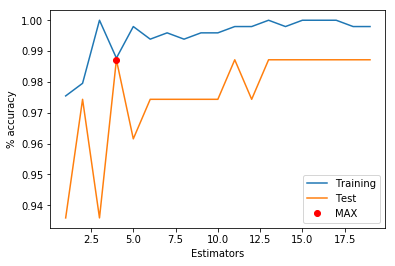

490 0.9871794871794872
Result By Random Forest Classifier
1 0.9358974358974359 0.9754601226993865
2 0.9743589743589743 0.9795501022494888
3 0.9358974358974359 1.0
4 0.9871794871794872 0.9877300613496932
5 0.9615384615384616 0.9979550102249489
6 0.9743589743589743 0.9938650306748467
7 0.9743589743589743 0.9959100204498977
8 0.9743589743589743 0.9938650306748467
9 0.9743589743589743 0.9959100204498977
10 0.9743589743589743 0.9959100204498977
11 0.9871794871794872 0.9979550102249489
12 0.9743589743589743 0.9979550102249489
13 0.9871794871794872 1.0
14 0.9871794871794872 0.9979550102249489
15 0.9871794871794872 1.0
16 0.9871794871794872 1.0
17 0.9871794871794872 1.0
18 0.9871794871794872 0.9979550102249489
19 0.9871794871794872 0.9979550102249489
Max Accuracy 0.9871794871794872At Estimators = 4


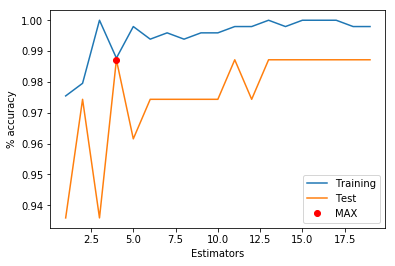

Result By Random Forest Classifier
1 0.958904109589041 0.9736842105263158
2 0.958904109589041 0.9696356275303644
3 0.9315068493150684 0.9959514170040485
4 0.9315068493150684 0.9878542510121457
5 0.9315068493150684 0.9979757085020243
6 0.958904109589041 0.9959514170040485
7 0.958904109589041 0.9959514170040485
8 0.958904109589041 0.9939271255060729
9 0.958904109589041 0.9959514170040485
10 0.9863013698630136 0.9959514170040485
11 0.9863013698630136 0.9979757085020243
12 0.9863013698630136 0.9979757085020243
13 0.9726027397260274 1.0
14 0.9863013698630136 0.9979757085020243
15 1.0 1.0
16 1.0 1.0
17 1.0 1.0
18 0.9863013698630136 1.0
19 0.9863013698630136 1.0
Max Accuracy 1.0At Estimators = 15


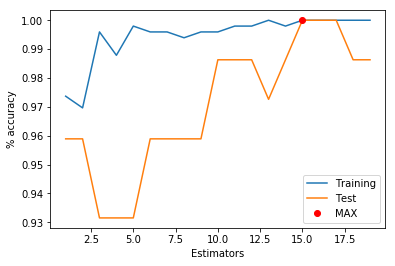

495 1.0
Result By Random Forest Classifier
1 0.958904109589041 0.9736842105263158
2 0.958904109589041 0.9696356275303644
3 0.9315068493150684 0.9959514170040485
4 0.9315068493150684 0.9878542510121457
5 0.9315068493150684 0.9979757085020243
6 0.958904109589041 0.9959514170040485
7 0.958904109589041 0.9959514170040485
8 0.958904109589041 0.9939271255060729
9 0.958904109589041 0.9959514170040485
10 0.9863013698630136 0.9959514170040485
11 0.9863013698630136 0.9979757085020243
12 0.9863013698630136 0.9979757085020243
13 0.9726027397260274 1.0
14 0.9863013698630136 0.9979757085020243
15 1.0 1.0
16 1.0 1.0
17 1.0 1.0
18 0.9863013698630136 1.0
19 0.9863013698630136 1.0
Max Accuracy 1.0At Estimators = 15


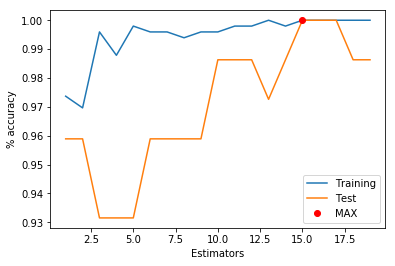

Result By Random Forest Classifier
1 0.9705882352941176 0.9779559118236473
2 0.9705882352941176 0.969939879759519
3 0.9411764705882353 0.9959919839679359
4 0.9411764705882353 0.9859719438877755
5 0.9411764705882353 0.9979959919839679
6 0.9705882352941176 0.9959919839679359
7 0.9705882352941176 0.9959919839679359
8 0.9705882352941176 0.9939879759519038
9 0.9705882352941176 0.9959919839679359
10 0.9852941176470589 0.9959919839679359
11 0.9852941176470589 0.9979959919839679
12 0.9852941176470589 0.9979959919839679
13 0.9705882352941176 1.0
14 0.9705882352941176 0.9979959919839679
15 0.9705882352941176 1.0
16 0.9852941176470589 1.0
17 0.9852941176470589 1.0
18 0.9852941176470589 1.0
19 0.9852941176470589 1.0
Max Accuracy 0.9852941176470589At Estimators = 10


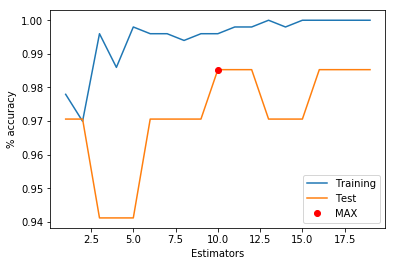

500 0.9852941176470589
Result By Random Forest Classifier
1 0.9705882352941176 0.9779559118236473
2 0.9705882352941176 0.969939879759519
3 0.9411764705882353 0.9959919839679359
4 0.9411764705882353 0.9859719438877755
5 0.9411764705882353 0.9979959919839679
6 0.9705882352941176 0.9959919839679359
7 0.9705882352941176 0.9959919839679359
8 0.9705882352941176 0.9939879759519038
9 0.9705882352941176 0.9959919839679359
10 0.9852941176470589 0.9959919839679359
11 0.9852941176470589 0.9979959919839679
12 0.9852941176470589 0.9979959919839679
13 0.9705882352941176 1.0
14 0.9705882352941176 0.9979959919839679
15 0.9705882352941176 1.0
16 0.9852941176470589 1.0
17 0.9852941176470589 1.0
18 0.9852941176470589 1.0
19 0.9852941176470589 1.0
Max Accuracy 0.9852941176470589At Estimators = 10


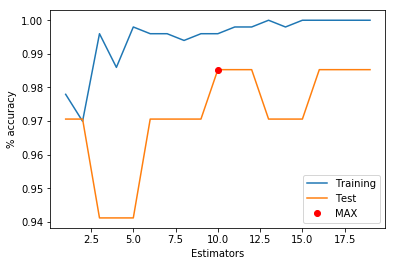

Result By Random Forest Classifier
1 0.9682539682539683 0.9781746031746031
2 0.9841269841269841 0.9801587301587301
3 0.9682539682539683 0.996031746031746
4 0.9523809523809523 0.9880952380952381
5 0.9682539682539683 0.998015873015873
6 0.9682539682539683 0.996031746031746
7 0.9682539682539683 0.996031746031746
8 0.9682539682539683 0.9940476190476191
9 0.9682539682539683 0.996031746031746
10 0.9682539682539683 0.996031746031746
11 0.9841269841269841 0.998015873015873
12 0.9841269841269841 0.998015873015873
13 0.9841269841269841 0.998015873015873
14 0.9841269841269841 0.998015873015873
15 1.0 0.998015873015873
16 1.0 0.998015873015873
17 1.0 0.998015873015873
18 0.9841269841269841 0.998015873015873
19 0.9841269841269841 0.998015873015873
Max Accuracy 1.0At Estimators = 15


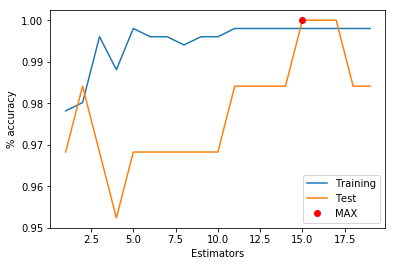

505 1.0
Result By Random Forest Classifier
1 0.9682539682539683 0.9781746031746031
2 0.9841269841269841 0.9801587301587301
3 0.9682539682539683 0.996031746031746
4 0.9523809523809523 0.9880952380952381
5 0.9682539682539683 0.998015873015873
6 0.9682539682539683 0.996031746031746
7 0.9682539682539683 0.996031746031746
8 0.9682539682539683 0.9940476190476191
9 0.9682539682539683 0.996031746031746
10 0.9682539682539683 0.996031746031746
11 0.9841269841269841 0.998015873015873
12 0.9841269841269841 0.998015873015873
13 0.9841269841269841 0.998015873015873
14 0.9841269841269841 0.998015873015873
15 1.0 0.998015873015873
16 1.0 0.998015873015873
17 1.0 0.998015873015873
18 0.9841269841269841 0.998015873015873
19 0.9841269841269841 0.998015873015873
Max Accuracy 1.0At Estimators = 15


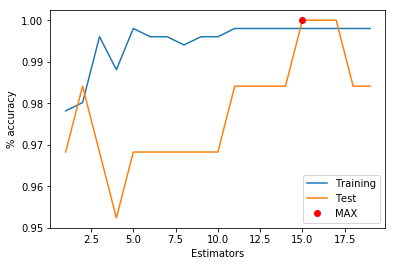

Result By Random Forest Classifier
1 0.9655172413793104 0.9783889980353635
2 0.9655172413793104 0.9646365422396856
3 0.9827586206896551 0.9960707269155207
4 0.9655172413793104 0.9862475442043221
5 0.9827586206896551 1.0
6 0.9827586206896551 0.9941060903732809
7 0.9827586206896551 0.9980353634577603
8 0.9827586206896551 0.9960707269155207
9 0.9827586206896551 0.9980353634577603
10 0.9827586206896551 0.9980353634577603
11 1.0 0.9980353634577603
12 1.0 0.9980353634577603
13 1.0 0.9980353634577603
14 1.0 0.9980353634577603
15 1.0 0.9980353634577603
16 1.0 0.9980353634577603
17 1.0 0.9980353634577603
18 1.0 0.9980353634577603
19 1.0 0.9980353634577603
Max Accuracy 1.0At Estimators = 11


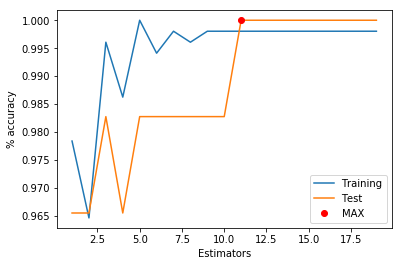

510 1.0
Result By Random Forest Classifier
1 0.9655172413793104 0.9783889980353635
2 0.9655172413793104 0.9646365422396856
3 0.9827586206896551 0.9960707269155207
4 0.9655172413793104 0.9862475442043221
5 0.9827586206896551 1.0
6 0.9827586206896551 0.9941060903732809
7 0.9827586206896551 0.9980353634577603
8 0.9827586206896551 0.9960707269155207
9 0.9827586206896551 0.9980353634577603
10 0.9827586206896551 0.9980353634577603
11 1.0 0.9980353634577603
12 1.0 0.9980353634577603
13 1.0 0.9980353634577603
14 1.0 0.9980353634577603
15 1.0 0.9980353634577603
16 1.0 0.9980353634577603
17 1.0 0.9980353634577603
18 1.0 0.9980353634577603
19 1.0 0.9980353634577603
Max Accuracy 1.0At Estimators = 11


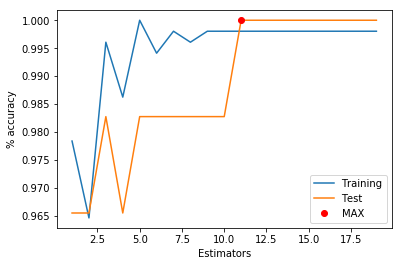

Result By Random Forest Classifier
1 0.9811320754716981 0.9708171206225681
2 1.0 0.9708171206225681
3 1.0 0.9902723735408561
4 0.9811320754716981 0.9902723735408561
5 1.0 0.9941634241245136
6 0.9811320754716981 0.9941634241245136
7 0.9811320754716981 0.9941634241245136
8 0.9811320754716981 0.9941634241245136
9 0.9811320754716981 0.9961089494163424
10 0.9811320754716981 0.9980544747081712
11 0.9811320754716981 0.9980544747081712
12 0.9811320754716981 0.9980544747081712
13 1.0 0.9980544747081712
14 0.9811320754716981 1.0
15 1.0 1.0
16 0.9811320754716981 1.0
17 0.9811320754716981 1.0
18 0.9811320754716981 1.0
19 0.9811320754716981 1.0
Max Accuracy 1.0At Estimators = 2


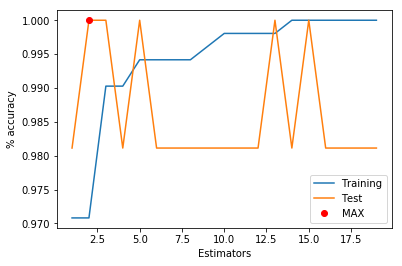

515 1.0
Result By Random Forest Classifier
1 0.9811320754716981 0.9708171206225681
2 1.0 0.9708171206225681
3 1.0 0.9902723735408561
4 0.9811320754716981 0.9902723735408561
5 1.0 0.9941634241245136
6 0.9811320754716981 0.9941634241245136
7 0.9811320754716981 0.9941634241245136
8 0.9811320754716981 0.9941634241245136
9 0.9811320754716981 0.9961089494163424
10 0.9811320754716981 0.9980544747081712
11 0.9811320754716981 0.9980544747081712
12 0.9811320754716981 0.9980544747081712
13 1.0 0.9980544747081712
14 0.9811320754716981 1.0
15 1.0 1.0
16 0.9811320754716981 1.0
17 0.9811320754716981 1.0
18 0.9811320754716981 1.0
19 0.9811320754716981 1.0
Max Accuracy 1.0At Estimators = 2


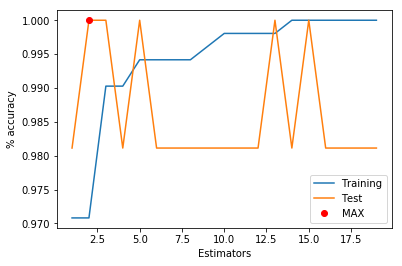

Result By Random Forest Classifier
1 0.9791666666666666 0.9710982658959537
2 1.0 0.9710982658959537
3 1.0 0.9903660886319846
4 0.9791666666666666 0.9903660886319846
5 1.0 0.9980732177263969
6 0.9791666666666666 0.9961464354527938
7 0.9791666666666666 0.9961464354527938
8 0.9791666666666666 0.9980732177263969
9 0.9791666666666666 1.0
10 0.9791666666666666 1.0
11 0.9791666666666666 1.0
12 0.9791666666666666 1.0
13 1.0 1.0
14 0.9791666666666666 1.0
15 0.9791666666666666 1.0
16 0.9791666666666666 1.0
17 0.9791666666666666 1.0
18 0.9791666666666666 1.0
19 0.9791666666666666 1.0
Max Accuracy 1.0At Estimators = 2


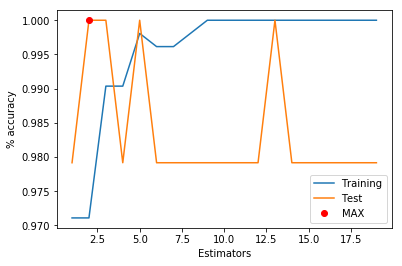

520 1.0
Result By Random Forest Classifier
1 0.9791666666666666 0.9710982658959537
2 1.0 0.9710982658959537
3 1.0 0.9903660886319846
4 0.9791666666666666 0.9903660886319846
5 1.0 0.9980732177263969
6 0.9791666666666666 0.9961464354527938
7 0.9791666666666666 0.9961464354527938
8 0.9791666666666666 0.9980732177263969
9 0.9791666666666666 1.0
10 0.9791666666666666 1.0
11 0.9791666666666666 1.0
12 0.9791666666666666 1.0
13 1.0 1.0
14 0.9791666666666666 1.0
15 0.9791666666666666 1.0
16 0.9791666666666666 1.0
17 0.9791666666666666 1.0
18 0.9791666666666666 1.0
19 0.9791666666666666 1.0
Max Accuracy 1.0At Estimators = 2


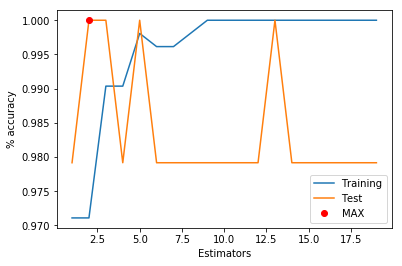

Result By Random Forest Classifier
1 0.9767441860465116 0.9713740458015268
2 1.0 0.9713740458015268
3 1.0 0.9885496183206107
4 0.9767441860465116 0.9866412213740458
5 1.0 0.9923664122137404
6 0.9767441860465116 0.9923664122137404
7 0.9767441860465116 0.9961832061068703
8 0.9767441860465116 0.9961832061068703
9 0.9767441860465116 0.9980916030534351
10 0.9767441860465116 0.9980916030534351
11 0.9767441860465116 0.9980916030534351
12 0.9767441860465116 0.9980916030534351
13 0.9767441860465116 0.9980916030534351
14 0.9767441860465116 0.9980916030534351
15 0.9767441860465116 0.9980916030534351
16 0.9767441860465116 1.0
17 0.9767441860465116 1.0
18 0.9767441860465116 1.0
19 0.9767441860465116 1.0
Max Accuracy 1.0At Estimators = 2


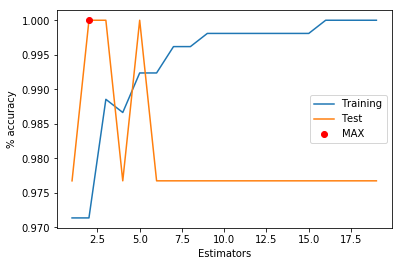

525 1.0
Result By Random Forest Classifier
1 0.9767441860465116 0.9713740458015268
2 1.0 0.9713740458015268
3 1.0 0.9885496183206107
4 0.9767441860465116 0.9866412213740458
5 1.0 0.9923664122137404
6 0.9767441860465116 0.9923664122137404
7 0.9767441860465116 0.9961832061068703
8 0.9767441860465116 0.9961832061068703
9 0.9767441860465116 0.9980916030534351
10 0.9767441860465116 0.9980916030534351
11 0.9767441860465116 0.9980916030534351
12 0.9767441860465116 0.9980916030534351
13 0.9767441860465116 0.9980916030534351
14 0.9767441860465116 0.9980916030534351
15 0.9767441860465116 0.9980916030534351
16 0.9767441860465116 1.0
17 0.9767441860465116 1.0
18 0.9767441860465116 1.0
19 0.9767441860465116 1.0
Max Accuracy 1.0At Estimators = 2


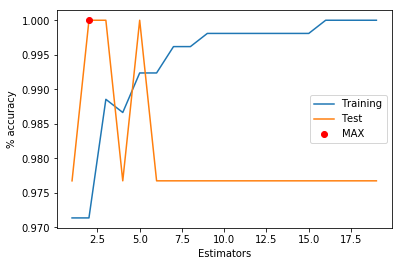

Result By Random Forest Classifier
1 0.9736842105263158 0.9716446124763705
2 1.0 0.9716446124763705
3 1.0 0.9886578449905482
4 0.9736842105263158 0.9867674858223062
5 1.0 0.9924385633270322
6 0.9736842105263158 0.9924385633270322
7 0.9736842105263158 0.996219281663516
8 0.9736842105263158 0.996219281663516
9 0.9736842105263158 0.998109640831758
10 0.9736842105263158 0.998109640831758
11 0.9736842105263158 0.998109640831758
12 0.9736842105263158 0.998109640831758
13 1.0 0.998109640831758
14 1.0 0.998109640831758
15 1.0 0.998109640831758
16 0.9736842105263158 1.0
17 0.9736842105263158 1.0
18 0.9736842105263158 1.0
19 0.9736842105263158 1.0
Max Accuracy 1.0At Estimators = 2


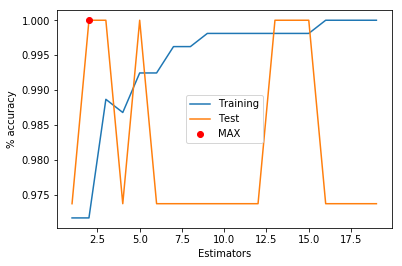

530 1.0
Result By Random Forest Classifier
1 0.9736842105263158 0.9716446124763705
2 1.0 0.9716446124763705
3 1.0 0.9886578449905482
4 0.9736842105263158 0.9867674858223062
5 1.0 0.9924385633270322
6 0.9736842105263158 0.9924385633270322
7 0.9736842105263158 0.996219281663516
8 0.9736842105263158 0.996219281663516
9 0.9736842105263158 0.998109640831758
10 0.9736842105263158 0.998109640831758
11 0.9736842105263158 0.998109640831758
12 0.9736842105263158 0.998109640831758
13 1.0 0.998109640831758
14 1.0 0.998109640831758
15 1.0 0.998109640831758
16 0.9736842105263158 1.0
17 0.9736842105263158 1.0
18 0.9736842105263158 1.0
19 0.9736842105263158 1.0
Max Accuracy 1.0At Estimators = 2


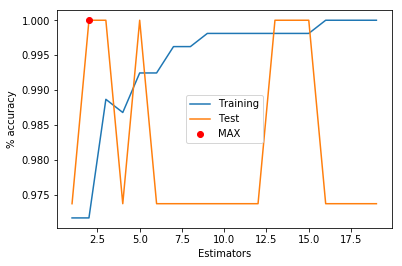

Result By Random Forest Classifier
1 0.9696969696969697 0.9719101123595506
2 1.0 0.9719101123595506
3 1.0 0.9887640449438202
4 0.9696969696969697 0.9868913857677902
5 1.0 0.9925093632958801
6 0.9696969696969697 0.9925093632958801
7 1.0 0.9962546816479401
8 1.0 0.99812734082397
9 1.0 1.0
10 1.0 1.0
11 1.0 1.0
12 1.0 1.0
13 1.0 1.0
14 1.0 1.0
15 1.0 1.0
16 1.0 1.0
17 1.0 1.0
18 1.0 1.0
19 1.0 1.0
Max Accuracy 1.0At Estimators = 2


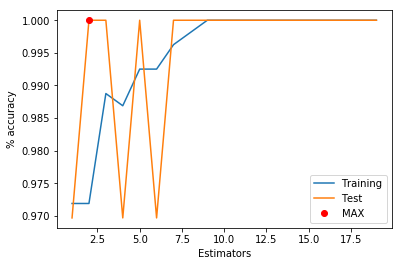

535 1.0
Result By Random Forest Classifier
1 0.9696969696969697 0.9719101123595506
2 1.0 0.9719101123595506
3 1.0 0.9887640449438202
4 0.9696969696969697 0.9868913857677902
5 1.0 0.9925093632958801
6 0.9696969696969697 0.9925093632958801
7 1.0 0.9962546816479401
8 1.0 0.99812734082397
9 1.0 1.0
10 1.0 1.0
11 1.0 1.0
12 1.0 1.0
13 1.0 1.0
14 1.0 1.0
15 1.0 1.0
16 1.0 1.0
17 1.0 1.0
18 1.0 1.0
19 1.0 1.0
Max Accuracy 1.0At Estimators = 2


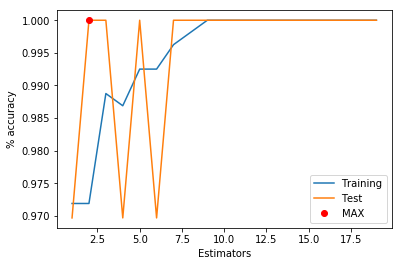

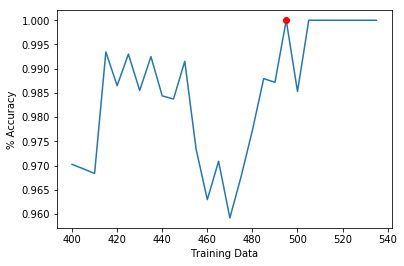

In [14]:
if __name__ == "__main__":
    print (CancerAnalysis('wisc_bc_data.csv',index= 425).byknn())
    acc =[]
    
    for i in range(400,540,5):
        print(i,CancerAnalysis('wisc_bc_data.csv',i).byrandom())
        acc.append(CancerAnalysis('wisc_bc_data.csv',i).byrandom())
    plt.plot(range(400,540,5),acc,label="Test")

    plt.xlabel('Training Data')
    plt.ylabel('% Accuracy')
    plt.plot(acc.index(max(acc))*5+400,max(acc),'ro',label="MAX")
    plt.show()